<a href="https://colab.research.google.com/github/Gisecy/UPSO_Proc.DeImagenes/blob/main/GiselaYede_Proyecto2_PPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Una empresa está desarrollando una red neuronal capaz de identificar señales de
tránsito. Es necesario normalizar las imágenes del dataset para que tengan la misma
dimensión (tamaño).

a) Escribir una función que reciba como parámetros dos strings, uno contendrá la
ruta para acceder a una imagen, y el otro una palabra clave, que podrá ser “Youtube,
Instagram, Twitter o Facebook”. La función debe redimensionar la imagen al tamaño
adecuado especificado como parámetro para cada una de las palabras clave
(busque las dimensiones recomendadas de cada aplicación).


In [ ]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
import cv2
from google.colab.patches import cv2_imshow
import skimage.io as io
from skimage.color import rgb2gray
from skimage import data, filters, io, feature, color
from skimage.feature import canny


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!cp D:\Mis documentos\UPSO Gisela\SEGUNDO CUATRIMESTRE 2022\Python Avanzado\Pillow y Scikit Image\show.py
import show

cp: target 'Imageshow.py' is not a directory


In [ ]:
folder = "/content/drive/MyDrive/Python/PPA/PDI-Imgs/"

In [ ]:
def redimImg(imagen):
    ancho = 700
    porc_ancho = (ancho/float(imagen.size[0]))
    alto = int((float(imagen.size[1])*float(porc_ancho)))
    img = imagen.resize((ancho,alto), Image.ANTIALIAS)
    imagen.save(folder + "habitacion-oscura.jpg")

img = Image.open(folder + "habitacion-oscura.jpg")
redimImg(img)

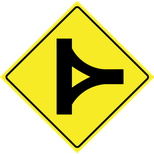

In [ ]:
#Funcion para redimensionar imagen:

def redimImg (ruta, clave):
  img = Image.open(ruta)
  if clave == "Youtube":
    img = img.resize((640,360), Image.ANTIALIAS)
  elif clave == "Facebook":
    img = img.resize((154,154), Image.ANTIALIAS)
  elif clave == "Instagram":
    img = img.resize((110,110), Image.ANTIALIAS)
  elif clave == "Twitter":
    img = img.resize((216,146), Image.ANTIALIAS)

  img.save(folder +"img_resized.png")


#Comprobcion:
rutaImg = folder + "Entronque_delta.png"
redimImg(rutaImg, "Facebook")

imagen = Image.open(folder + "img_resized.png")
imagen


b) Una vez que la red neuronal comenzó a dar sus primeros resultados, el cliente
pidió un reporte de avances en el que quiere comparar la imagen original con lo que
identificó la red. Diseñar una función que a partir de las rutas de dos imágenes, las
ajuste (mismo tamaño) y las muestre enfrentadas

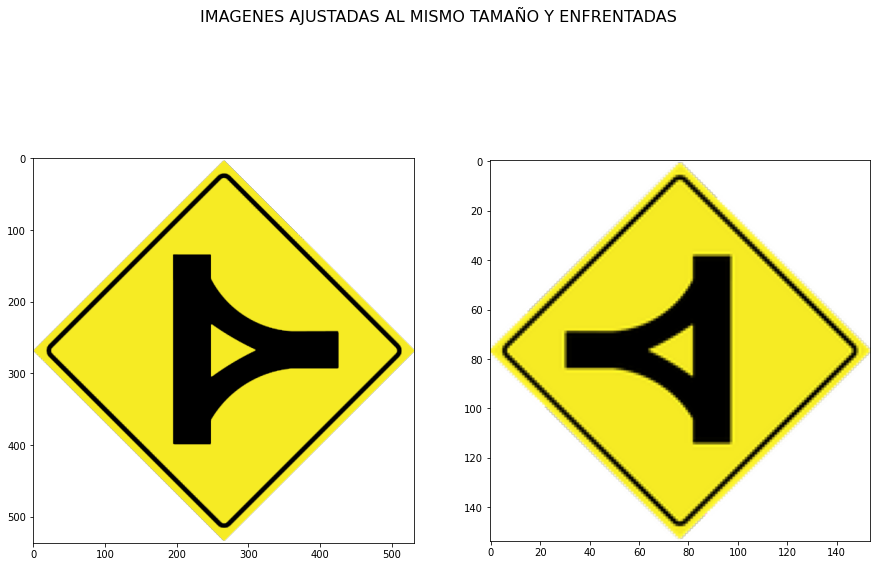

In [ ]:
#Funcion que ajusta a tamaño predeterminado y la enfrenta con la funcion mirror:

def ajusteTamanioMirror(ruta_orig, ruta_norm, size=(15,10), title="IMAGENES AJUSTADAS AL MISMO TAMAÑO Y ENFRENTADAS"):
  imgOri = Image.open(ruta_orig)
  imgNor = Image.open(ruta_norm)
  figure, axis = plt.subplots(1, 2)
  figure.set_size_inches(size)
  figure.suptitle(title, size=16)
  axis[0].imshow(imgOri)
  axis[1].imshow(ImageOps.mirror(imgNor))


#VERIFICACION:
rutaO = folder + "Entronque_delta.png"
rutaR= folder + "img_resized.png"
ajusteTamanioMirror(rutaO,rutaR)


2. Seleccionar una imagen de su agrado, y generar otras 9 aplicando cada uno de los
filtros de los siguientes filtros de Pillow. Mostrar y guardar el resultado de cada una.
ORIGINAL, BLUR,
CONTOUR, DETAIL,
EDGE, ENHANCE EDGE, ENHANCE MORE,
EMBOSS, FIND, EDGES,
SHARPEN, SMOOTH.


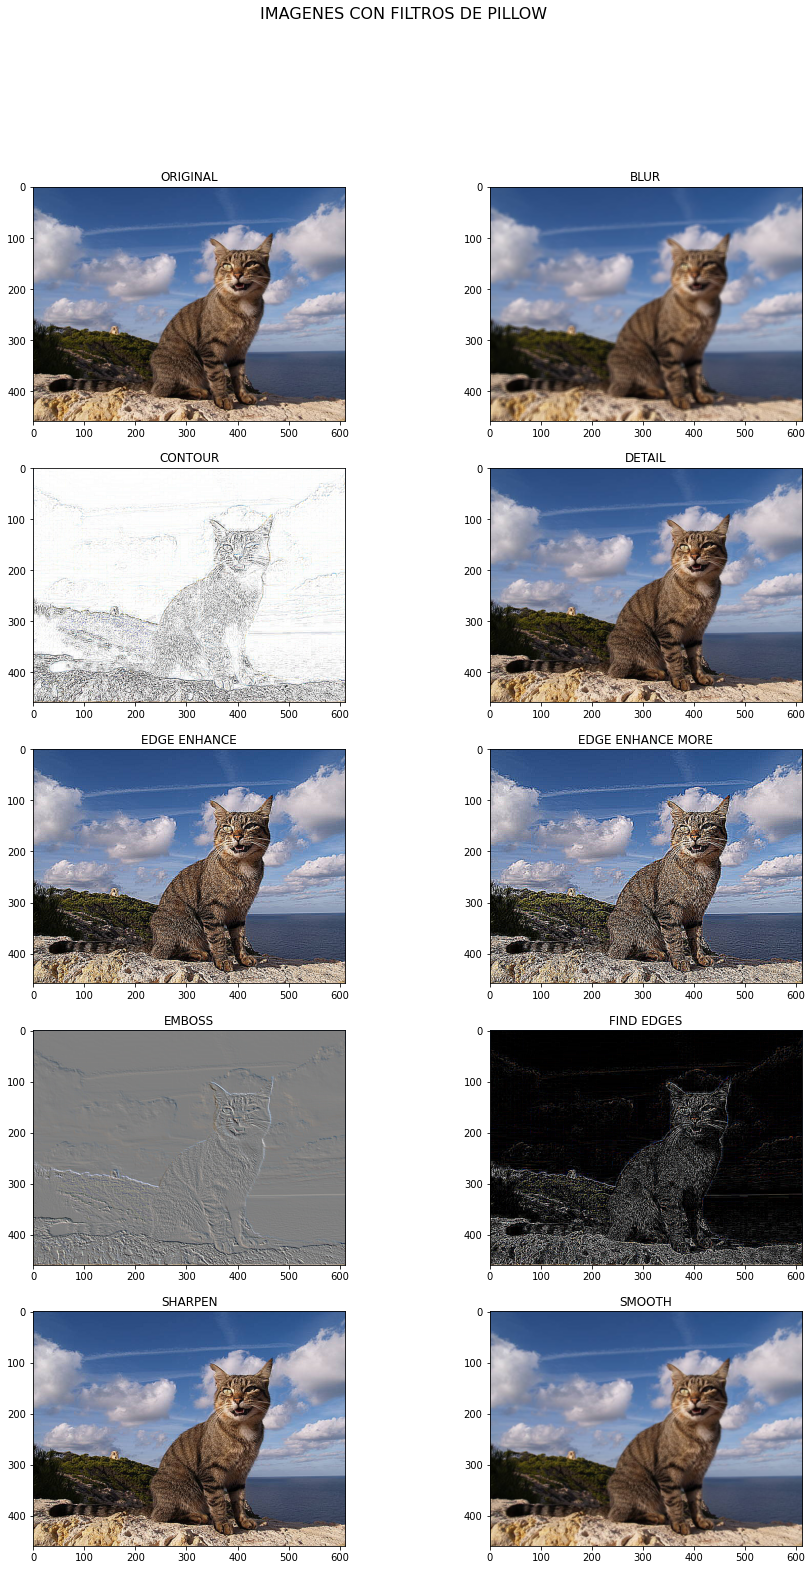

In [ ]:
OrigImg = Image.open(folder + "gatoplaya.jpg")
figure, axis = plt.subplots(5, 2)
figure.suptitle("IMAGENES CON FILTROS DE PILLOW", size=16)
figure.set_size_inches(15,25)
axis[0,0].imshow(OrigImg)
axis[0,0].set_title("ORIGINAL")

blurImg = OrigImg.filter(ImageFilter.BLUR)
axis[0,1].set_title("BLUR")
axis[0,1].imshow(blurImg)
blurImg.save(folder + "gatoplaya1BLUR.png")

contourImg = OrigImg.filter(ImageFilter.CONTOUR)
axis[1,0].set_title("CONTOUR")
axis[1,0].imshow(contourImg)
contourImg.save(folder + "gatoplaya1CONTOUR.png")

detailImg = OrigImg.filter(ImageFilter.DETAIL)
axis[1,1].set_title("DETAIL")
axis[1,1].imshow(detailImg)
detailImg.save(folder + "gatoplaya1DETAIL.png")

edgeEnhImg = OrigImg.filter(ImageFilter.EDGE_ENHANCE)
axis[2,0].set_title("EDGE ENHANCE")
axis[2,0].imshow(edgeEnhImg)
edgeEnhImg.save(folder + "gatoplaya1EDGE_ENH.png")

edgeEMImg = OrigImg.filter(ImageFilter.EDGE_ENHANCE_MORE)
axis[2,1].set_title("EDGE ENHANCE MORE")
axis[2,1].imshow(edgeEMImg)
edgeEMImg.save(folder + "gatoplaya1EDGE_EM.png")

embossImg = OrigImg.filter(ImageFilter.EMBOSS)
axis[3,0].set_title("EMBOSS")
axis[3,0].imshow(embossImg)
embossImg.save(folder + "gatoplaya1EMBOSS.png")

findEdgesImg = OrigImg.filter(ImageFilter.FIND_EDGES)
axis[3,1].set_title("FIND EDGES")
axis[3,1].imshow(findEdgesImg)
findEdgesImg.save(folder + "gatoplaya1FIND_EDGES.png")

sharpenImg = OrigImg.filter(ImageFilter.SHARPEN)
axis[4,0].set_title("SHARPEN")
axis[4,0].imshow(sharpenImg)
sharpenImg.save(folder + "gatoplaya1SHARPEN.png")

smoothImg = OrigImg.filter(ImageFilter.SMOOTH)
axis[4,1].set_title("SMOOTH")
axis[4,1].imshow(smoothImg)
smoothImg.save(folder + "gatoplaya1SMOOTH.png")

3. Cree una función que ajuste el contraste de una imagen utilizando su histograma.
Probala con una imagen oscura.

Leyendo la documentacion de OpenCV de equalizeHist(), encontre que se puede aplicar la equalizacion sobre los distintos modelos de color(RGB, HSV, YCrCb). A cotinuacion se detallan las funciones de equalizacion en los distintos modelos. Se puede apreciar que las 3 funciones devolvieron valores distintos.


Funcion para equalizar sobre el modelo RGB, y se equalizar sobre las 3 capas:


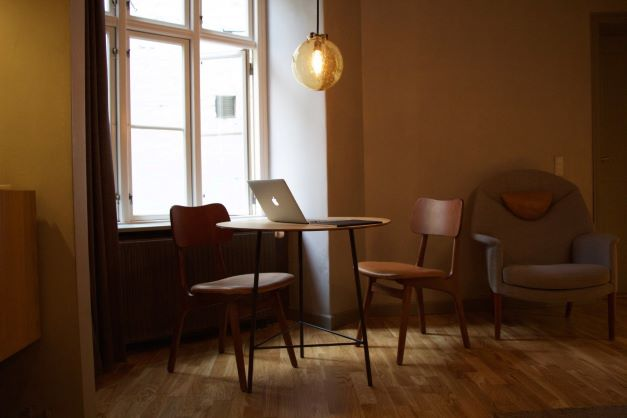

In [ ]:
img = cv2.imread(folder + 'habitacion_oscura.jpg')
cv2_imshow(img)

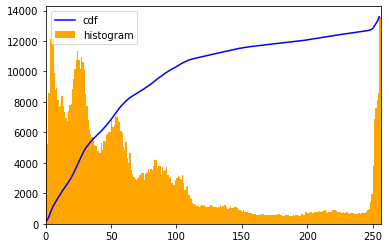

In [ ]:
# FUNCION PARA CEAR Y DIBUJAR HISTOGRAMA:

def creaHist (img):
  # Creo el histograma:
  hist,bins = np.histogram(img.flatten(),256,[0,256])

  # Funcion de distribucion acumulativa:
  cdf = hist.cumsum()
  cdf_normalized = cdf * float(hist.max()) / cdf.max()

  # Dibujo el histograma:
  plt.plot(cdf_normalized, color = 'b')
  plt.hist(img.flatten(),256,[0,256], color = 'orange')
  plt.xlim([0,256])
  plt.legend(('cdf','histogram'), loc = 'upper left')
  plt.show()

creaHist(img) # Genera el histograma de la imagen original

Funcion para equalizar sobre el modelo de color RGB, y se equalizar sobre las 3 capas:


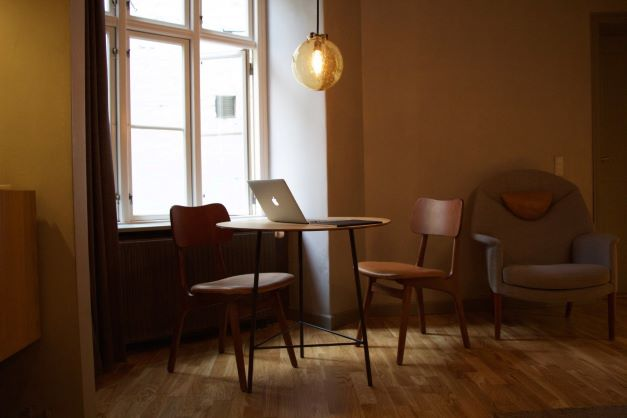

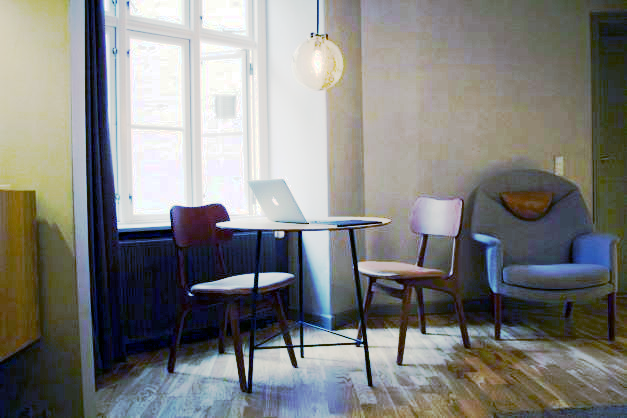

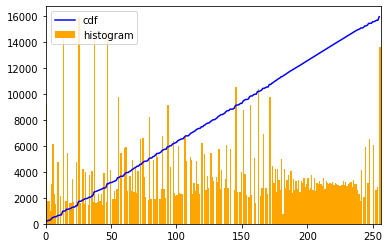

In [ ]:
def equalizarHist(imagen):
    b, g, r = cv2.split(imagen)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    imagen= cv2.merge((blue, green, red))
    return imagen

cv2_imshow(img)
imagen = equalizarHist(img)
cv2_imshow(imagen)
creaHist(imagen)

A continuacion detallo la funcion de ajustar el contraste sobre el modelo de color HSV(tono, saturacion, valor), sobre la capa brillo:

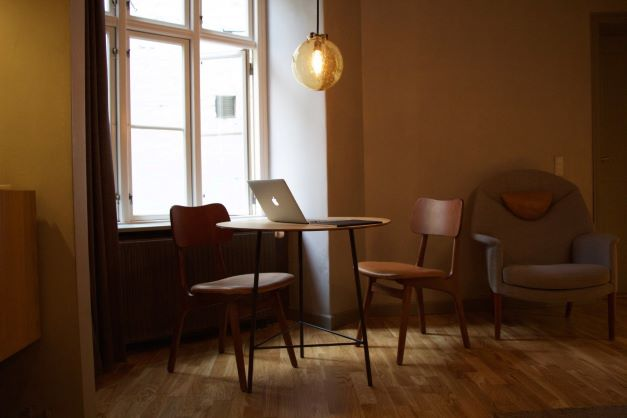

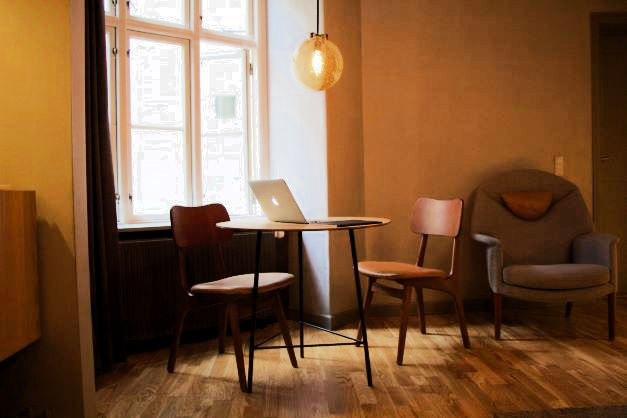

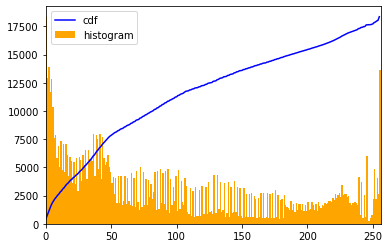

In [ ]:
def ajustarContrasteV(imagen):

  img_hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV) # Convierto la imagen de RGB a HSV
  img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2]) # Ecualizar histograma en el canal V
  imagen_equ = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # Convertir imagen de HSV a RGB.
  return imagen_equ


cv2_imshow(img) # Muestro imagen original.
imagenV = ajustarContrasteV(img) # Llamo a funcion para ajustar contraste.
cv2_imshow(imagenV) # Muestro la imagen ajustada.
creaHist(imagenV) # LLamo a funcion para crear y graficar el histograma de la imagen ajustada.

La funcion a continuacion aplica la equalizacion sobre el modelo de color Ycrcb(luminancia, crominancia). Sobre la capa de luminancia:

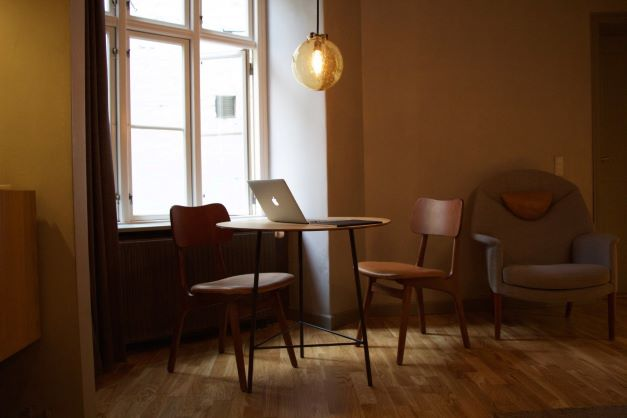

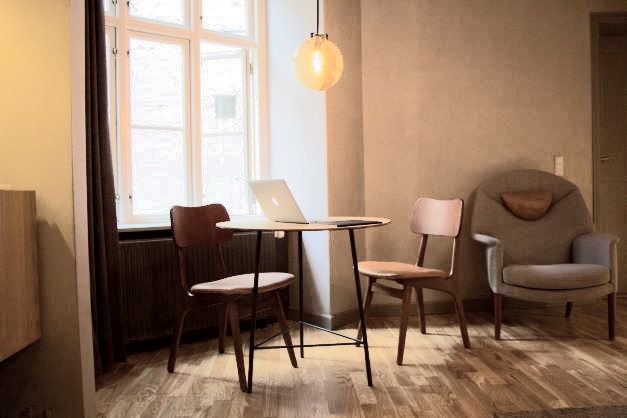

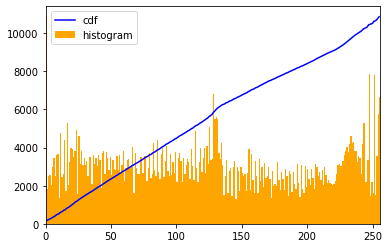

In [ ]:
def ajustarContrasteY(imagen):

    ycrcb_img = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb) # Convertir imagen de RGB a YCrCb.
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0]) # Ecualizar el histograma en el canal Y.
    imagen_equ = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR) # Convertir de YCrCb a RGB
    return imagen_equ


cv2_imshow(img)
imagenY = ajustarContrasteY(img)
cv2_imshow(imagenY)
creaHist(imagenY)

4. Su equipo de trabajo está creando una aplicación en Python para asistir a pintores y
dibujantes. Le han solicitado a usted programar una función que a partir de una foto
de una persona, ayude a los clientes a dibujar el boceto de la persona de la foto.
Pruebe su función con una foto de su elección

FUNCION PARA DIBUJAR EL BOCETO DE UNA FOTO:
A continuacion se muestran dos funciones para hacer el boceto de la imagen. Instale libreria rembg, funcion.



In [ ]:
# Instalo libreria rembg e importo la funcion remove para eliminar el fondo de la imagen:
!pip install rembg
from PIL import Image
from rembg import remove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#  Solución que funciona para evitar cualquier advertencia de obsolescencia (Error: PIL.Image no tiene la funcion resampling):
import PIL.Image
if not hasattr(PIL.Image, 'Resampling'):
    PIL.Image.Resampling = PIL.Image

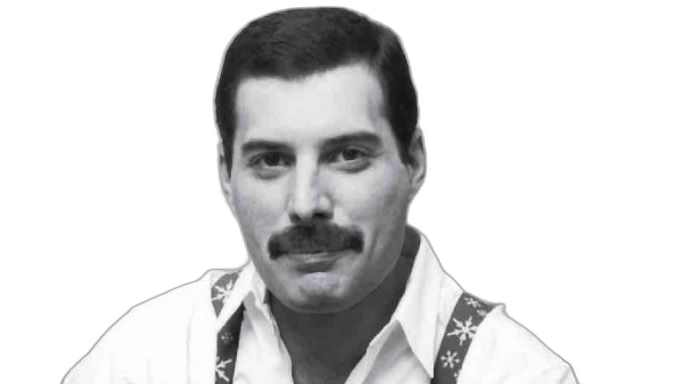

In [ ]:
# Abro el archivo y con la funcion remove, remuevo el fondo de la imagen:
imag =Image.open(folder + "Freddie.jpg")
imag = remove(imag)
imag

Filtros de ImageFilter de Pillow: Utilice SHARPEN, FIND_EDGES y DETAIL

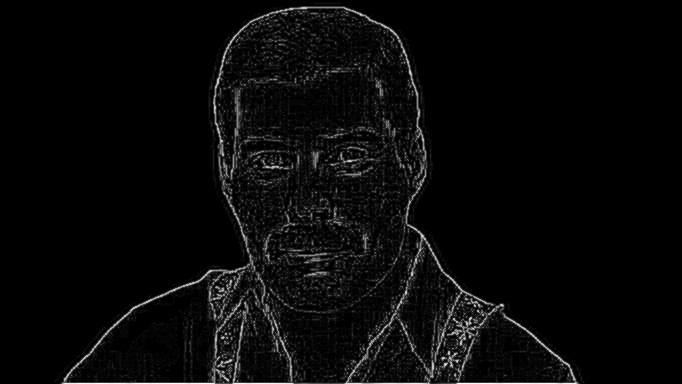

In [ ]:
def  boceto (imagen):

  img_gris = imagen.convert("L")
  feImg = img_gris.filter(ImageFilter.FIND_EDGES)
  feImg = feImg.filter(ImageFilter.EDGE_ENHANCE)
  feImg = feImg.filter(ImageFilter.SMOOTH)
  return feImg

# VERIFICACION:
boceto(imag)

Como ya utilice los filtros de Pillow en el ejercicio anterior, busque en linea como utilizar filtros de OpenCV.


Utilice la funcion gaussianBlur para suavizar la imagen y Canny para la deteccion de de bordes.

Referencias: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html, https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html


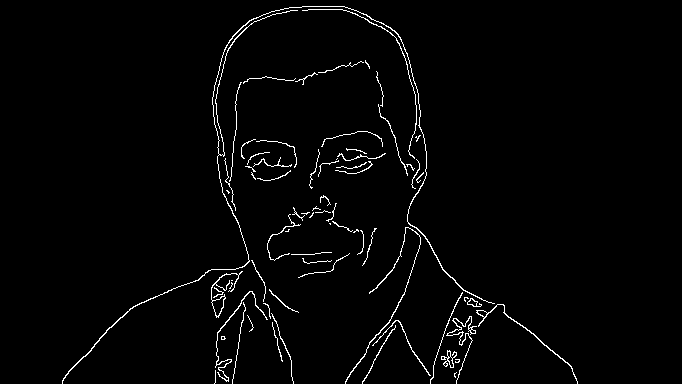

In [ ]:
def boceto (imagen):

  imagen = np.asarray(imagen)
  img_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Converti la imagen a escala de grises.
  gauss = cv2.GaussianBlur(img_gris, (5,5), 0) #Para el tamaño del nucleo gaussiano me fije en ejemplos para no adentrar en calculos y fui probando con los valores impares.
  canny = cv2.Canny(gauss, 60, 150) #Probando deje estos valores sobre el valor minimo y el valor maximo. Y deje por defecto el gradiente 3.
  cv2_imshow(canny)

#VERIFICACION:
boceto(imag)

5. Se desea separar de una imagen satelital máscaras para aislar (resaltar en color)
lotes de un campo. Esto puede lograrse utilizando máscaras binarias a partir de la
conversión de una imagen RGB a formato ‘L’ (escala de grises). El código para
hacer esto se vio en la clase de consulta y está disponible en Moodle.
Sobre el final del código se muestra como generar una máscara personalizada
utilizando “ImageDraw”. Esta máscara se genera con las coordenadas de las cuatro
esquinas del lote que deseamos resaltar. Luego se utiliza el método composite para
resaltar el lote deseado.


a) Analizar el código en su totalidad para tener un buen entendimiento del
funcionamiento y comentar cada uno de los bloques

In [ ]:
# Funcion para mostrar las caracteristicas de una imagen:
def show_img_data(im):
    print('Formato: ',im.format) # Muestra el formato del archivo imagen. (.jpg, .png, etc.)
    print('Modo: ',im.mode) # Muestra el formato de color de la imagen.
    print('Tamaño: ',im.size) # Muestra el tamaño de la imagen.
    print('Paleta de color: ',im.palette) # Muestra el tipo de paleta de color de la imagen.

Formato:  JPEG
Modo:  RGB
Tamaño:  (600, 400)
Paleta de color:  None


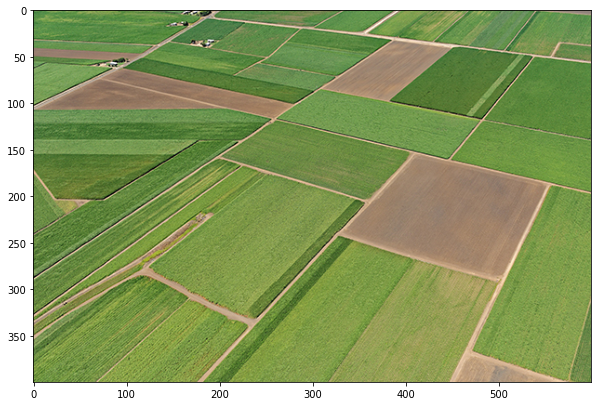

In [ ]:
img = Image.open(folder + "lotes.jpg") # Abro la imagen y la guardo en una variable..
show_img_data(img) # Llamo a la funcion de arriba que muetra las caracteristicas de la imagen.
show.image(img) # Llamo a funcion (que se encuentra en el modulo cargado show.py) y la muestro.

Formato:  None
Modo:  L
Tamaño:  (600, 400)
Paleta de color:  None


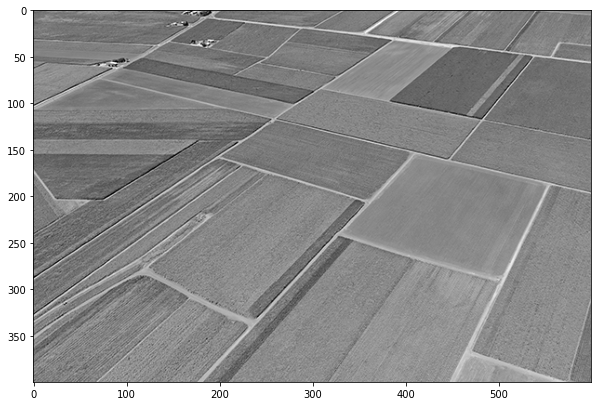

In [ ]:
# Conversion de la imagen a formato L (Luminancia):

img_g = img.convert('L') # Convierto la imagen a formato L (Luminancia) y la guardo en una nueva variable.
show_img_data(img_g) # Llamo a la funcion show_img_data que muestra las caracteristicas de la imagen.
show.image(img_g) # Llamo a funcion (que se encuentra en el modulo cargado show.py) y muestro la imagen.

In [ ]:
print(np.array(img_g)) # Muestro en pantalla la binarizacion de la imagen convertida a formato "L".

[[165 125 126 ... 133 135 135]
 [113 114 129 ... 135 137 136]
 [107  98 102 ... 133 133 134]
 ...
 [148 119  93 ... 134 111 137]
 [111  86 125 ... 120 108 131]
 [111 137 150 ... 115 113 128]]


Formato:  None
Modo:  L
Tamaño:  (600, 400)
Paleta de color:  None


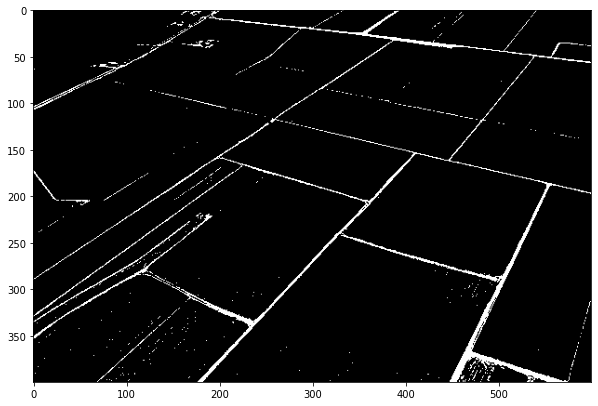

In [ ]:
threshold = 170 # Agino 170 como valor umbral de intensidad (esto puede variar para llegar a elegir la umbralizacion optima).
#threshold = 80    # PARA EL EJEMPLO DE MAPS

mask_caminos = img_g.point( lambda p: 255 if p > threshold else 0 ) # Funcion lambda que recorre la matriz de la imagen y a todos los valores menores a 170 les asigna 0 = negro y lo guarda en una variable.

show_img_data(mask_caminos) # Llamo a la funcion show_img_data que muestra las caracteristicas de la  nueva imagen.
show.image(mask_caminos) # Llamo a funcion (que se encuentra en el modulo cargado show.py) y muestro la iamgen.

In [ ]:
print(np.array(mask_caminos)) # Muestro el arreglo de la imagen anterior ( mask_caminos).

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


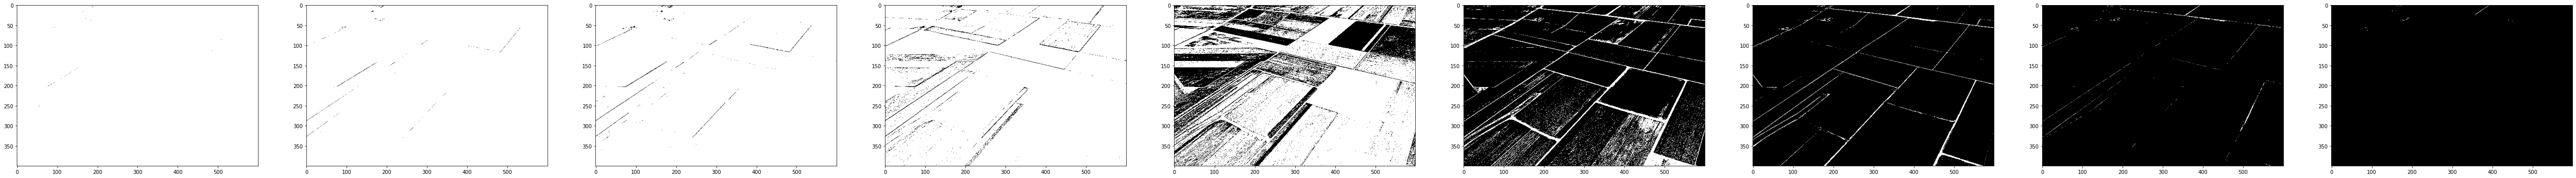

In [ ]:
# Prueba los distintos umbrales de binarizacion:
image_list = [] # Creo una lista vacia para las imagenes.
for threshold in range(0, 255, 30): # Ciclo for de umbralizacion desde 0 a 255(donde 0 = negro y 255=blanco), en saltos de 30.
    mask_caminos = img_g.point( lambda p: 255 if p > threshold else 0 ) # Funcion lambda que recorre la matriz de la imagen y a todos los valores menores a la umbralizacion les asigna 0 = negro y lo guarda en una variable.
    image_list.append(mask_caminos) # Guarda las imagenes que se van creando en el ciclo.

show.N_images(image_list, (len(image_list)*10, 10)) # Llamo a funcion N_images (modulo cargado show.py) y muestro las imagenes guardadas en la lista.

In [ ]:
# from PIL import ImageFilter (importo de Pillow la funcion ImageFilter, esta comentada porque la importe al comienzo de este notebook)

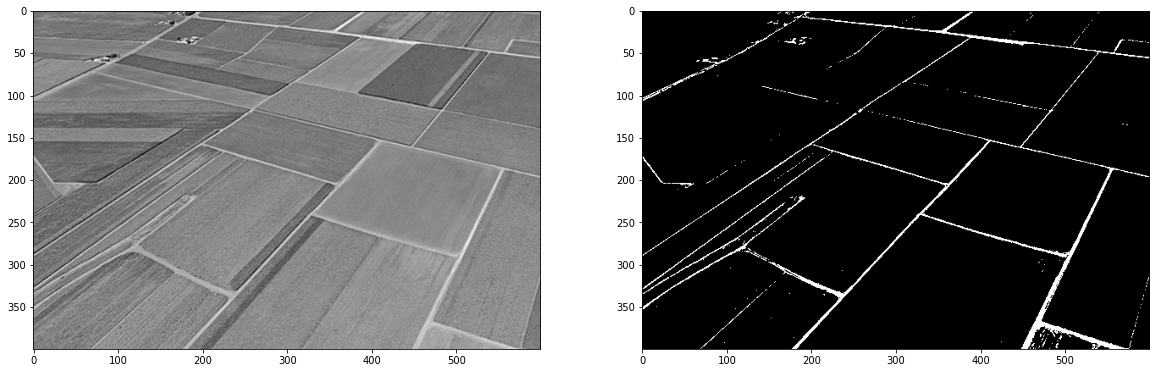

In [ ]:
# Aplicacion de filtros para mejorar la mascara:

threshold = 170 # asigno 170 como valor umbral de intensidad.
#threshold = 70   #PARA EL EJEMPLO DE MAPS

img_g_filtered = img_g #Reasigno un nuevo nombre a la imagen.

# Prueba de distintos filtro de la imagen generada en formato "L"

#img_g_filtered = img_g.filter(ImageFilter.BLUR         )
#img_g_filtered = img_g.filter(ImageFilter.EDGE_ENHANCE )
#img_g_filtered = img_g.filter(ImageFilter.CONTOUR      )
#img_g_filtered = img_g.filter(ImageFilter.SMOOTH       )
#img_g_filtered = img_g.filter(ImageFilter.FIND_EDGES   )
#img_g_filtered = img_g.filter(ImageFilter.SHARPEN      )

#Filtros adicionales
img_g_filtered = img_g.filter         (ImageFilter.SMOOTH   ) # filtro smooth utilizado.
img_g_filtered = img_g_filtered.filter(ImageFilter.SHARPEN  ) #filtro sharpen utilizado por encima del filtro smooth.

mask_caminos = img_g_filtered.point( lambda p: 255 if p > threshold else 0 ) # Funcion lambda que convierte a todos los valores menores al valor de umbral(en este caso 170) en 0 = negro y lo guarda en una variable.

show.two_images(img_g_filtered, mask_caminos, (20,10)) # Llama a funcion two_images (modulo cargado show.py)y muetra la imagen con filtros aplicados y la imagen con mascara, con un tamaño de imagen de (20,10).

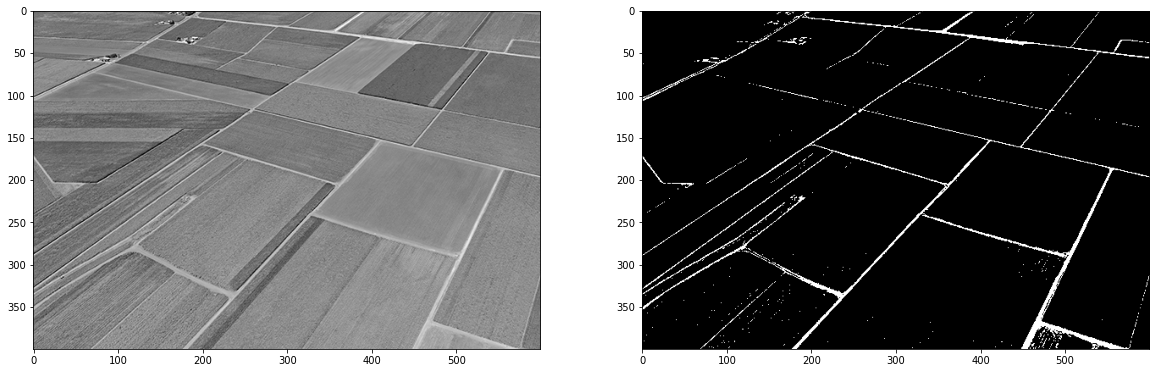

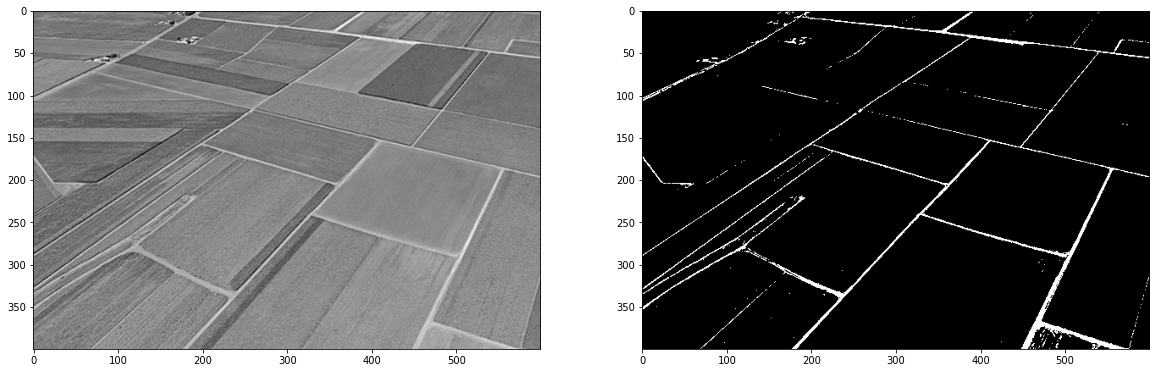

In [ ]:
# Repite todo el paso anterior:
# Muestra la imagen con formato "L" y la imagen con la mascara creada.
img_g_filtered = img_g
mask_caminos   = img_g_filtered.point (lambda p: 255 if p > threshold else 0)
show.two_images(img_g_filtered, mask_caminos, (20,10))

# Muestra la imagen con formato "L" a cual se le aplicaron los filtros SMOOTH y SHARPEN y la imagen con la mascara creada.
img_g_filtered = img_g
img_g_filtered = img_g.filter         (ImageFilter.SMOOTH  )
img_g_filtered = img_g_filtered.filter(ImageFilter.SHARPEN )
mask_caminos   = img_g_filtered.point (lambda p: 255 if p > threshold else 0)
show.two_images(img_g_filtered, mask_caminos, (20,10))

b) Reutilizar el código de la última sección y escribir una función que tome
cuatro puntos indicados por el usuario y genere una máscara para mostrar
una parcela. Cuando hablamos de última sección nos referimos al apartado
“MOSTRAR UN CUADRANTE SELECCIONADO CON MASCARA
MANUAL”.

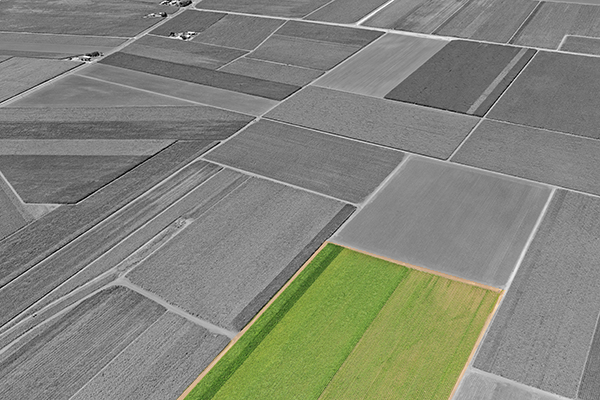

In [ ]:
from PIL import ImageDraw

def mostrarCuadrante (p1, p2,p3,p4):

  img = Image.open(folder + "lotes.jpg")
  img_l = img.convert('L')

  mask = Image.new('L', (img.width, img.height), (255)) # Tipo, tamaño, color

  mask_draw = ImageDraw.Draw(mask)
  mask_draw.polygon([p1,p2,p3,p4], fill=0)
  img_compos = Image.composite(img_l, img, mask)
  img_compos.save(folder + "img_compos.png")
  return img_compos

# VERIFICACION:
p1 = (175,400)
p2 = (325,240)
p3 = (505,290)
p4 = (450,400)
mostrarCuadrante (p1, p2,p3,p4)


c) En cuanto tengan la función hecha y funcionando, modificarla para que
puedan mostrarse dos lotes coloreados en una misma imagen. Esto implica
dibujar dos regiones en la máscara antes de aplicarla, o generar una
máscara, aplicarla, luego generar otra máscara y aplicarla. Elegir la opción
que prefieran.

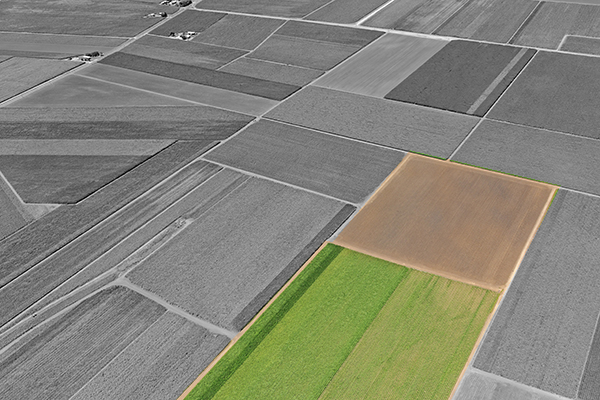

In [ ]:
# Funcion para mostrar dos regiones y aplicar en la mascara:
#(los parametros de la funcion podrian haber sido dos listas con los 4 puntos de cada cuadrante tambien)

def mostrarCuadrantes (im1_p1, im1_p2,im1_p3,im1_p4, im2_p1, im2_p2, im2_p3, im2_p4):

  img = Image.open(folder + "lotes.jpg")
  img_l = img.convert('L')
  mask = Image.new('L', (img.width, img.height), (255)) # Tipo, tamaño, color

  mask_draw1 = ImageDraw.Draw(mask)
  mask_draw2 = ImageDraw.Draw(mask)
  mask_draw1.polygon([im1_p1,im1_p2,im1_p3,im1_p4], fill=0)
  mask_draw2.polygon([im2_p1, im2_p2, im2_p3, im2_p4], fill=0)
  img_compos1 = Image.composite(img_l, img, mask)
  img_compos1.save(folder + "img_compos.png")
  return img_compos1

# VERIFICACION:
# Puntos cuadrante 1:
i1p1 = (175,400)
i1p2 = (325,240)
i1p3 = (505,290)
i1p4 = (450,400)

# Puntos cuadrante 2:
i2p1 = (330,245)
i2p2 = (410,150)
i2p3 = (560,185)
i2p4 = (505,290)
mostrarCuadrantes (i1p1, i1p2,i1p3,i1p4, i2p1, i2p2, i2p3, i2p4)